# **Understand the Data:**

In [1]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/house price (2).zip')

In [ ]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


make a 2 new column from 'latitude', 'longitude'

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
df['location_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])


In [ ]:
df['location_cluster'].value_counts()

,count
location_cluster,
1,60475
2,41427
9,29833
5,27790
3,8138
0,773
4,4
7,2
6,2


In [ ]:
city_center = (df['latitude'].median(), df['longitude'].median())

df['distance_from_center'] = (((df['latitude'] - city_center[0])**2) +((df['longitude'] - city_center[1])**2))**0.5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   property_id           168446 non-null  int64  
 1   location_id           168446 non-null  int64  
 2   page_url              168446 non-null  object 
 3   property_type         168446 non-null  object 
 4   price                 168446 non-null  int64  
 5   location              168446 non-null  object 
 6   city                  168446 non-null  object 
 7   province_name         168446 non-null  object 
 8   latitude              168446 non-null  float64
 9   longitude             168446 non-null  float64
 10  baths                 168446 non-null  int64  
 11  area                  168446 non-null  object 
 12  purpose               168446 non-null  object 
 13  bedrooms              168446 non-null  int64  
 14  date_added            168446 non-null  object 
 15  

In [ ]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size,location_cluster,distance_from_center
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188,3.415029,4.240681
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327,2.930444,3.491769
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000,0.000000,0.007836
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000,1.000000,1.364540
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000,2.000000,2.192233
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000,5.000000,8.816536
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000,9.000000,51.377004


In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
# Generate report
profile = ProfileReport(df, title="House Price Dataset Profile", explorative=True)

# Display the report in colab
profile.to_notebook_iframe()

# save HTML file
profile.to_file("House Price Dataset Profile.html")

.

**property_type**

# **Clean Data:**

In [ ]:
df['property_type'].value_counts()

,count
property_type,
House,105468
Flat,38238
Upper Portion,13774
Lower Portion,9229
Room,685
Farm House,657
Penthouse,395


In [ ]:
rare_types = ['Room', 'Farm House', 'Penthouse']
df['property_type'] = df['property_type'].replace(rare_types, 'Other')

.

**price**

In [ ]:
df['price'].nunique()

2077

In [ ]:
print(df['price'].min())
df['price'].max()

0


2000000000

In [ ]:
(df['price']==0).sum()

np.int64(3)

.

**location**

In [ ]:
df['location'].value_counts()

,count
location,
DHA Defence,22046
Bahria Town Karachi,8548
Bahria Town Rawalpindi,8502
Bahria Town,6429
Gulistan-e-Jauhar,5877
...,...
Gulshan-e-Ghazian,1
Central Avenue,1
NHA Housing Society,1


In [ ]:
((df['location'].value_counts())==1).sum()

np.int64(208)

In [ ]:
location_counts = df['location'].value_counts()
rare_locations = location_counts[location_counts == 1].index

df['location'] = df['location'].replace(rare_locations, 'Other')

.

**city**

In [ ]:
df['city'].nunique()

5

In [ ]:
df['city'].value_counts()

,count
city,
Karachi,60484
Lahore,41427
Islamabad,37426
Rawalpindi,20976
Faisalabad,8133


.

**baths**

In [ ]:
df['baths'].unique()

array([  2,   3,   6,   4,   8,   7,   5,   0,   1,  10,   9,  11,  13,
        12, 403,  14])

In [ ]:
df['baths'].value_counts()

,count
baths,
0,42382
3,34603
2,25754
4,19407
6,16648
5,15303
7,5385
1,5356
8,2035


In [ ]:
df['baths']=df['baths'].replace(0,np.nan)

.

**province_name**

In [ ]:
df['province_name'].unique()

array(['Islamabad Capital', 'Punjab', 'Sindh'], dtype=object)

In [ ]:
df['province_name'].value_counts()

,count
province_name,
Punjab,70536
Sindh,60484
Islamabad Capital,37426


.

**Area:**

In [ ]:
df['area'].nunique()

344

In [ ]:
df['area'].value_counts(1)

,proportion
area,
1 Kanal,0.119095
5 Marla,0.118513
10 Marla,0.103202
8 Marla,0.060114
4 Marla,0.039805
...,...
9.1 Kanal,0.000006
80 Kanal,0.000006
"6,222.2 Kanal",0.000006


In [ ]:
import re

def area_to_marla(x):
    x = str(x).lower().strip()

    # extract kanal value (supports decimals)
    kanal_match = re.search(r'(\d+(\.\d+)?)\s*kanal', x)
    kanal = float(kanal_match.group(1)) if kanal_match else 0

    # extract marla value (supports decimals)
    marla_match = re.search(r'(\d+(\.\d+)?)\s*marla', x)
    marla = float(marla_match.group(1)) if marla_match else 0

    # convert total to marla
    return kanal * 20 + marla

df['total_marla'] = df['area'].apply(area_to_marla)

In [ ]:
df.drop(columns=['area'], inplace=True)

.

**Purpose:**

In [ ]:
df['purpose'].value_counts()

,count
purpose,
For Sale,120655
For Rent,47791


.

**Bedrooms:**

In [ ]:
df['bedrooms']

,bedrooms
0,2
1,3
2,5
3,4
4,3
...,...
168441,6
168442,3
168443,6
168444,3


In [ ]:
(df['bedrooms']==0).sum()

np.int64(22704)

In [ ]:
df[df['bedrooms']==0]

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,location_cluster,distance_from_center,total_marla
12,1623818,3300,https://www.zameen.com/Property/f_6_f_6_2_hous...,House,400000000,F-6,Islamabad,Islamabad Capital,33.731532,73.065696,...,0,07-04-2019,NaN,NaN,Kanal,4.5,1-5 Kanal,5,2.271768,90.0
19,2384979,424,https://www.zameen.com/Property/islamabad_pwd_...,Flat,1750000,PWD Housing Scheme,Islamabad,Islamabad Capital,33.570792,73.145256,...,0,06-13-2019,Paris Real Estate & Builders,Chaudhary Naveed,Marla,1.5,0-5 Marla,9,2.112886,1.5
47,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,...,0,07-17-2019,Real Biz International,Usama Khan,Kanal,6.0,5-10 Kanal,2,1.269732,120.0
60,1646880,1781,https://www.zameen.com/Property/bahria_town_se...,House,18500000,Bahria Town,Lahore,Punjab,31.381706,74.195294,...,0,07-04-2019,Punjab Associates,Ch. Tariq Ali Ranjha,Marla,10.0,5-10 Marla,2,1.141785,10.0
83,3051476,373,https://www.zameen.com/Property/lahore_valenci...,House,65000000,Valencia Housing Society,Lahore,Punjab,31.405370,74.257078,...,0,06-02-2019,Punjaab Estates,Irfan Rehman Khan,Kanal,2.0,1-5 Kanal,2,1.202128,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168366,17355428,1052,https://www.zameen.com/Property/lahore_bankers...,House,12900000,Bankers Co-operative Housing Society,Lahore,Punjab,31.450522,74.394553,...,0,07-18-2019,M Ahmad Associates,Rizwan Saeed,Marla,5.0,0-5 Marla,2,1.338403,5.0
168383,17356216,3961,https://www.zameen.com/Property/johar_town_joh...,Lower Portion,28000,Johar Town,Lahore,Punjab,31.469082,74.266148,...,0,07-18-2019,NaN,NaN,Marla,5.0,0-5 Marla,2,1.210002,5.0
168393,17354543,478,https://www.zameen.com/Property/rawalpindi_adi...,House,6000000,Adiala Road,Rawalpindi,Punjab,33.550869,73.056182,...,0,07-18-2019,Adeel Real Estate & Builders,Adeel Shahzad Sheikh,Marla,5.0,0-5 Marla,9,2.091085,5.0
168402,17355396,478,https://www.zameen.com/Property/rawalpindi_adi...,House,13000000,Adiala Road,Rawalpindi,Punjab,33.550869,73.056182,...,0,07-18-2019,Umar Real Estate Builders,UMER,Marla,10.0,5-10 Marla,9,2.091085,10.0


In [ ]:
df['bedrooms'] = df['bedrooms'].replace(0, np.nan)

.

In [ ]:
df.drop(columns=['property_id','location_id','page_url','date_added','agency','agent','Area Type','Area Size','Area Category'], inplace=True)

In [ ]:
df.dropna(subset=['baths', 'bedrooms'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125623 entries, 0 to 168445
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   property_type         125623 non-null  object 
 1   price                 125623 non-null  int64  
 2   location              125623 non-null  object 
 3   city                  125623 non-null  object 
 4   province_name         125623 non-null  object 
 5   latitude              125623 non-null  float64
 6   longitude             125623 non-null  float64
 7   baths                 125623 non-null  float64
 8   purpose               125623 non-null  object 
 9   bedrooms              125623 non-null  float64
 10  location_cluster      125623 non-null  int32  
 11  distance_from_center  125623 non-null  float64
 12  total_marla           125623 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 12.9+ MB


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.to_csv('cleaned_house_price.csv', index=False)

.

In [ ]:
df.sort_values(by='price', ascending=True)

,index,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,location_cluster,distance_from_center,total_marla
118048,156148,House,1,Gulistan-e-Jauhar,Karachi,Sindh,24.912025,67.130730,4.0,For Sale,4.0,1,8.830862,4.8
121963,162480,House,1,New Katarian,Rawalpindi,Punjab,33.645741,73.059807,4.0,For Sale,9.0,5,2.185960,5.0
60148,74134,House,1,DHA Defence,Karachi,Sindh,24.786735,67.083292,6.0,For Sale,5.0,1,8.955724,20.0
121145,160908,House,1,PWD Road,Islamabad,Islamabad Capital,33.567125,73.134901,4.0,For Sale,4.0,9,2.108811,0.2
7903,9808,House,1,Johar Town,Lahore,Punjab,31.453379,74.289810,4.0,For Sale,3.0,2,1.233645,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45446,55589,House,1000000000,Clifton,Karachi,Sindh,24.825028,67.031579,10.0,For Sale,11.0,1,8.961910,80.0
62303,77087,House,1350000000,KDA Scheme 1,Karachi,Sindh,24.879857,67.090538,6.0,For Sale,5.0,1,8.881686,120.0
56119,68867,House,1430000000,Gulberg,Lahore,Punjab,31.522361,74.347172,9.0,For Sale,8.0,2,1.292506,260.0
47369,58032,House,1450000000,KDA Scheme 1,Karachi,Sindh,24.879857,67.090538,8.0,For Sale,8.0,1,8.881686,122.0


In [ ]:
df = df[df['price'] >= 1000]

In [ ]:
df.drop(columns=['index','latitude','longitude'],inplace=True)

In [ ]:
df=df[df['total_marla']<100]

In [ ]:
df=df[df['price']<100000009]

In [ ]:
df

,property_type,price,location,city,province_name,baths,purpose,bedrooms,location_cluster,distance_from_center,total_marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2.0,For Sale,2.0,5,2.220533,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3.0,For Sale,3.0,5,2.242809,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,6.0,For Sale,5.0,5,2.175567,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4.0,For Sale,4.0,9,2.249796,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3.0,For Sale,3.0,0,2.047537,8.0
...,...,...,...,...,...,...,...,...,...,...,...
125618,House,8800000,Bahria Town Karachi,Karachi,Sindh,4.0,For Sale,3.0,1,8.572896,8.0
125619,House,5000000,Bahria Town Karachi,Karachi,Sindh,4.0,For Sale,3.0,1,8.595664,5.0
125620,House,14000000,Bahria Town Karachi,Karachi,Sindh,3.0,For Sale,3.0,1,8.604617,8.0
125621,House,14000000,Bahria Town Karachi,Karachi,Sindh,4.0,For Sale,4.0,1,8.637126,14.0


Save clean data set

In [ ]:
df.to_csv('clean_house_data', index=False)

.

.

.

In [3]:
df=pd.read_csv('/content/clean_house_data')

In [4]:
df.head()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,location_cluster,distance_from_center,total_marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2.0,For Sale,2.0,5,2.220533,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3.0,For Sale,3.0,5,2.242809,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,6.0,For Sale,5.0,5,2.175567,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4.0,For Sale,4.0,9,2.249796,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3.0,For Sale,3.0,0,2.047537,8.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122355 entries, 0 to 122354
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   property_type         122355 non-null  object 
 1   price                 122355 non-null  int64  
 2   location              122355 non-null  object 
 3   city                  122355 non-null  object 
 4   province_name         122355 non-null  object 
 5   baths                 122355 non-null  float64
 6   purpose               122355 non-null  object 
 7   bedrooms              122355 non-null  float64
 8   location_cluster      122355 non-null  int64  
 9   distance_from_center  122355 non-null  float64
 10  total_marla           122355 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 10.3+ MB


In [6]:
df.isna().sum()

,0
property_type,0
price,0
location,0
city,0
province_name,0
baths,0
purpose,0
bedrooms,0
location_cluster,0
distance_from_center,0


In [7]:
df.duplicated().sum()

np.int64(36871)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,price,baths,bedrooms,location_cluster,distance_from_center,total_marla
count,8.548400e+04,85484.000000,85484.000000,85484.000000,85484.000000,85484.000000
mean,1.410764e+07,3.827652,3.690539,3.480160,4.290846,9.715148
std,1.792761e+07,2.253647,1.657258,2.969831,3.468478,8.258040
min,1.000000e+03,1.000000,1.000000,0.000000,0.007836,0.000000
25%,1.900000e+05,2.000000,2.000000,1.000000,1.378487,4.800000
50%,8.000000e+06,3.000000,3.000000,2.000000,2.193768,7.000000
75%,1.900000e+07,5.000000,5.000000,5.000000,8.827318,11.600000
max,1.000000e+08,403.000000,18.000000,9.000000,51.377004,96.000000


In [10]:
df.reset_index(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85484 entries, 0 to 85483
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 85484 non-null  int64  
 1   property_type         85484 non-null  object 
 2   price                 85484 non-null  int64  
 3   location              85484 non-null  object 
 4   city                  85484 non-null  object 
 5   province_name         85484 non-null  object 
 6   baths                 85484 non-null  float64
 7   purpose               85484 non-null  object 
 8   bedrooms              85484 non-null  float64
 9   location_cluster      85484 non-null  int64  
 10  distance_from_center  85484 non-null  float64
 11  total_marla           85484 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 7.8+ MB


In [12]:
df.drop(columns=['index'],inplace=True)

In [13]:
df.to_csv('house_data_84', index=False)

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,price,baths,bedrooms,location_cluster,distance_from_center,total_marla
price,1.000000,0.395013,0.458724,-0.136836,-0.034743,0.356300
baths,0.395013,1.000000,0.688686,0.057796,-0.168673,0.389751
bedrooms,0.458724,0.688686,1.000000,0.039358,-0.148285,0.445858
location_cluster,-0.136836,0.057796,0.039358,1.000000,-0.547359,0.080068
distance_from_center,-0.034743,-0.168673,-0.148285,-0.547359,1.000000,-0.104366
total_marla,0.356300,0.389751,0.445858,0.080068,-0.104366,1.000000


In [15]:
numeric_df.std()

,0
price,1.792761e+07
baths,2.253647e+00
bedrooms,1.657258e+00
location_cluster,2.969831e+00
distance_from_center,3.468478e+00
total_marla,8.258040e+00


In [16]:
numeric_df.cov()

,price,baths,bedrooms,location_cluster,distance_from_center,total_marla
price,3.213991e+14,1.595951e+07,1.362900e+07,-7.285396e+06,-2.160391e+06,5.274906e+07
baths,1.595951e+07,5.078926e+00,2.572157e+00,3.868278e-01,-1.318469e+00,7.253542e+00
bedrooms,1.362900e+07,2.572157e+00,2.746505e+00,1.937128e-01,-8.523675e-01,6.101881e+00
location_cluster,-7.285396e+06,3.868278e-01,1.937128e-01,8.819898e+00,-5.638230e+00,1.963675e+00
distance_from_center,-2.160391e+06,-1.318469e+00,-8.523675e-01,-5.638230e+00,1.203034e+01,-2.989334e+00
total_marla,5.274906e+07,7.253542e+00,6.101881e+00,1.963675e+00,-2.989334e+00,6.819522e+01


In [17]:
(df.std(numeric_only=True) / df.mean(numeric_only=True)) * 100

,0
price,127.077276
baths,58.878059
bedrooms,44.905596
location_cluster,85.336056
distance_from_center,80.834355
total_marla,85.001687


.

# **Plots:**

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

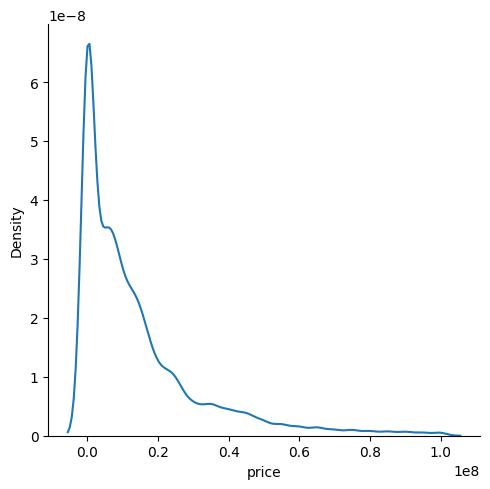

In [19]:
sns.displot(df['price'], kind='kde')
plt.show()

In [20]:
import plotly.express as px
fig = px.treemap(df, path=['price'], title='Prices')
fig.show()

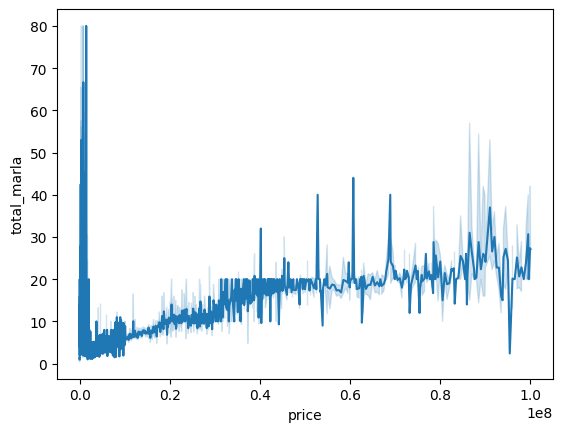

In [21]:
sns.lineplot(x=df['price'],y=df['total_marla'])
plt.show()

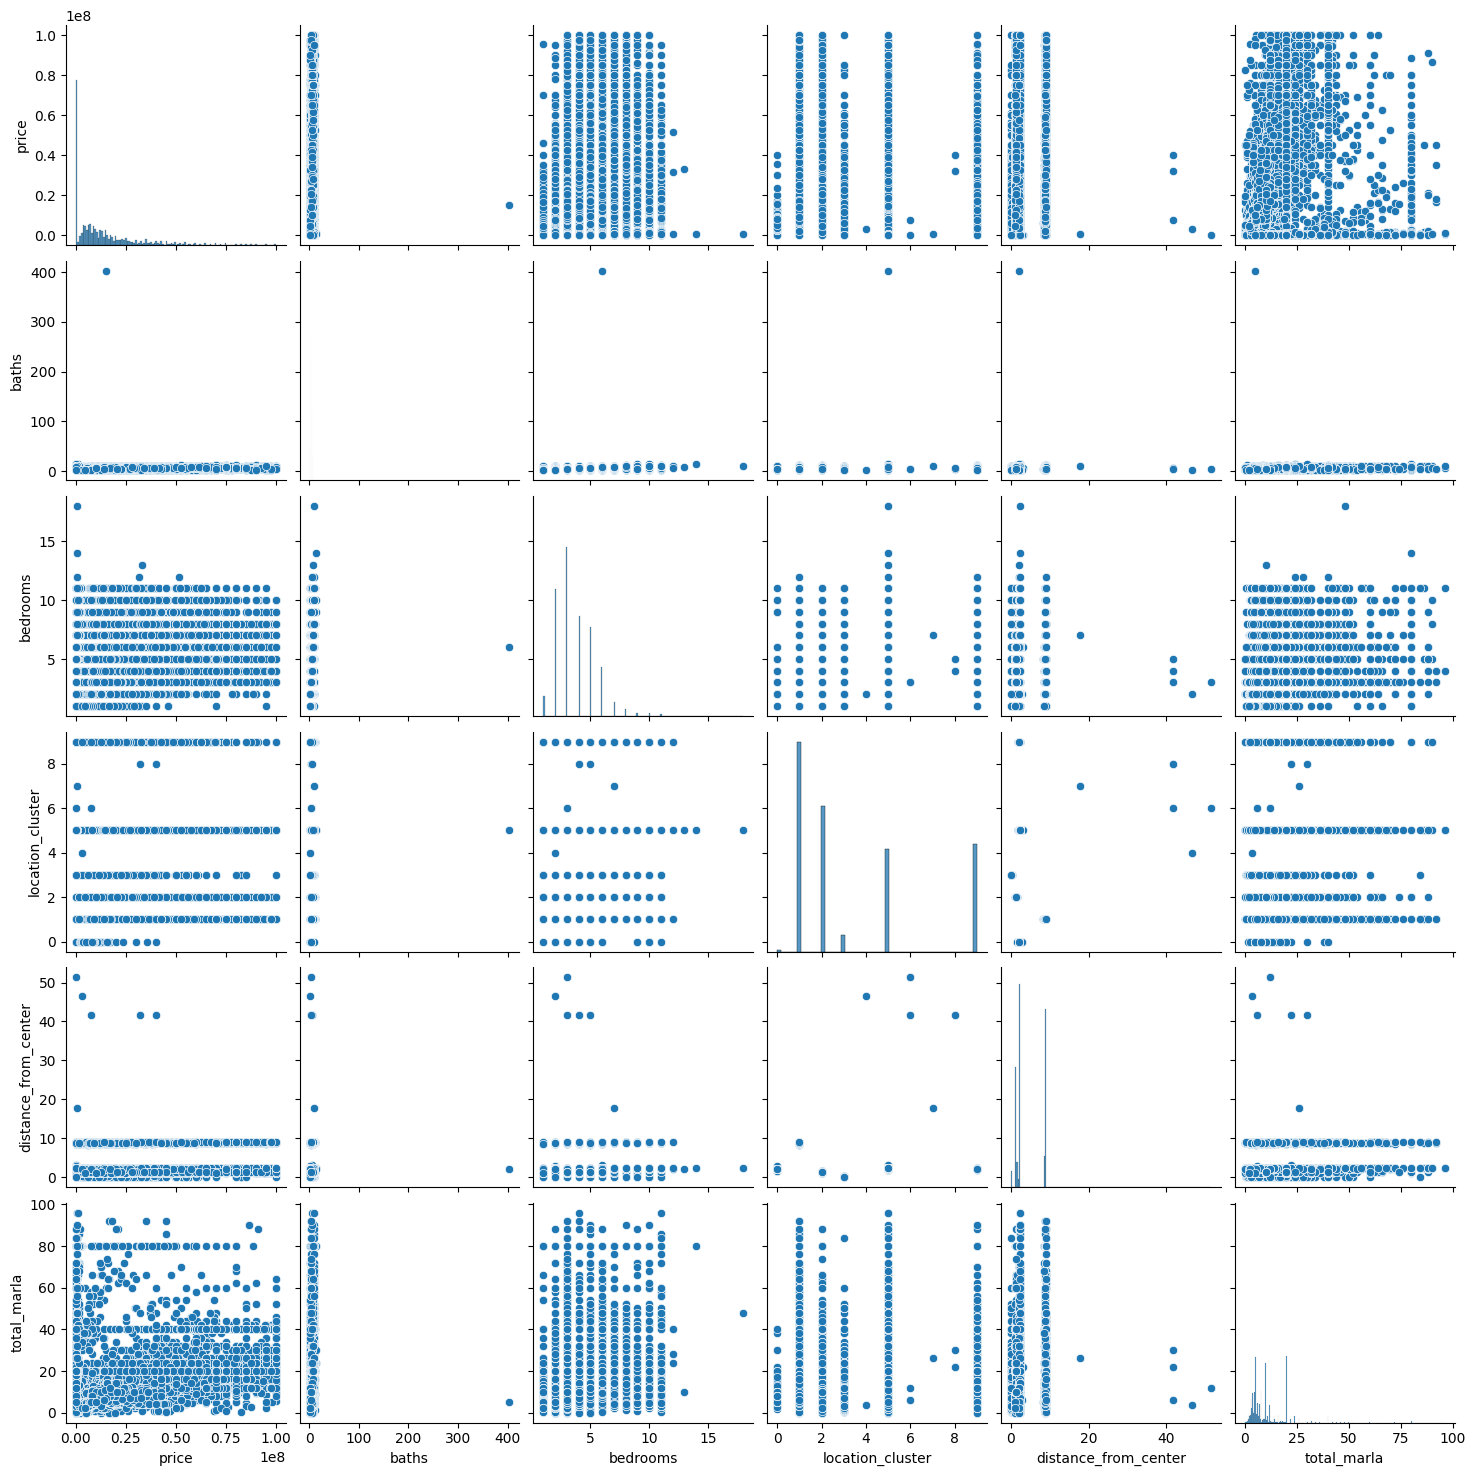

In [22]:
sns.pairplot(df)
plt.show()

.

.

# **Applying Model:**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x=df.drop(columns=['price'])
y=df['price']

In [25]:
cat_df=x.select_dtypes(include='object')
num_df=x.select_dtypes(include=['int64','float64'])

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [28]:
categorical_features = list(x_train.select_dtypes(include='object').columns)
numerical_features = list(x_train.select_dtypes(include=['int64', 'float64']).columns)

CL = ColumnTransformer(transformers=[
      ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
      ('num', StandardScaler(), numerical_features)
])

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
from sklearn.pipeline import Pipeline
PIPELINE=Pipeline(steps=[
    ('PREPROCESS',CL),
    ('MODEL',RandomForestRegressor())
])

In [31]:
PIPELINE.fit(x_train,y_train)

Pipeline(steps=[('PREPROCESS',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['property_type', 'location',
                                                   'city', 'province_name',
                                                   'purpose']),
                                                 ('num', StandardScaler(),
                                                  ['baths', 'bedrooms',
                                                   'location_cluster',
                                                   'distance_from_center',
                                                   'total_marla'])])),
                ('MODEL', RandomForestRegressor())])

In [32]:
y_pred=PIPELINE.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros



In [33]:
acc=PIPELINE.score(x_test,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros



### Regression Metrics

In [34]:
acc

0.9047372121410875

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 2512049.74
Mean Squared Error (MSE): 30059496762387.41
Root Mean Squared Error (RMSE): 5482654.17
R-squared (R2) Score: 0.90


.

.

In [36]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_features = list(x_train.select_dtypes(include='object').columns)
numerical_features = list(x_train.select_dtypes(include=['int64', 'float64']).columns)


preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

bagging_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=100,
        bootstrap=True,
        random_state=42
    ))
])

bagging_pipeline.fit(x_train, y_train)


y_pred_bagging = bagging_pipeline.predict(x_test)
bagging_r2 = bagging_pipeline.score(x_test, y_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print("Bagging Regressor Results:")
print(f"  R-squared (R2) Score: {r2_bagging:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_bagging:.2f}")
print(f"  Mean Squared Error (MSE): {mse_bagging:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_bagging:.2f}")


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros



Bagging Regressor Results:
  R-squared (R2) Score: 0.91
  Mean Absolute Error (MAE): 2509684.77
  Mean Squared Error (MSE): 29885246443765.73
  Root Mean Squared Error (RMSE): 5466740.02


In [37]:
bagging_r2

0.9052894359946143

### Hyperparameter Tuning with GridSearchCV

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
param_distributions = {
    'model__n_estimators': [80, 100, 120],
    'model__estimator__max_features': ['sqrt', 0.5],
    'model__estimator__max_depth': [10, 20, None],
    'model__estimator__min_samples_split': [2, 5],
    'model__estimator__min_samples_leaf': [2, 3]
}

grid_search = RandomizedSearchCV(
    estimator=bagging_pipeline,
    param_distributions=param_distributions,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['property_type',
                                                                                'location',
                                                                                'city',
                                                                                'province_name',
                                                                                'purpose']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['baths',
                                                                                'bedrooms',
                                                                                'location_cluster',
                                                                                'distance_from_center',
                                                                                'total_marla'])])),
                                             ('model',
                                              BaggingRegressor(estimator=DecisionTreeRegressor(),
                                                               n_estimators=100,
                                                               random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__estimator__max_depth': [10, 20,
                                                                        None],
                                        'model__estimator__max_features': ['sqrt',
                                                                           0.5],
                                        'model__estimator__min_samples_leaf': [2,
                                                                               3],
                                        'model__estimator__min_samples_split': [2,
                                                                                5],
                                        'model__n_estimators': [80, 100, 120]},
                   scoring='r2', verbose=2)

In [43]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best R-squared score found: {grid_search.best_score_:.2f}")

best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(x_test)
r2_grid = best_model.score(x_test, y_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_grid = mean_absolute_error(y_test, y_pred_grid)
mse_grid = mean_squared_error(y_test, y_pred_grid)
rmse_grid = np.sqrt(mse_grid)

print("\n--- Best Model (from RandomSearchCV) Performance on Test Set ")
print(f"  R-squared (R2) Score: {r2_grid:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_grid:.2f}")
print(f"  Mean Squared Error (MSE): {mse_grid:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_grid:.2f}")


Best parameters found: {'model__n_estimators': 120, 'model__estimator__min_samples_split': 2, 'model__estimator__min_samples_leaf': 3, 'model__estimator__max_features': 0.5, 'model__estimator__max_depth': None}
Best R-squared score found: 0.91


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros




--- Best Model (from RandomSearchCV) Performance on Test Set 
  R-squared (R2) Score: 0.91
  Mean Absolute Error (MAE): 2547795.45
  Mean Squared Error (MSE): 28893522511146.73
  Root Mean Squared Error (RMSE): 5375269.53
